In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import re

### Carica gli insiemi di video creati in 'subset_creation.ipynb'

In [3]:
%store -r good_videos avg_videos bad_videos

In [4]:
OPENFACE_DIR = 'openFace/processed/'
MEDIAPIPE_DIR = 'mediaPipe/processed/'

video = good_videos[0]
print(video)

play_lastofus_90


In [19]:
face_mesh = pd.read_csv('mediaPipe/faceMesh/face_mesh.csv')

nose_mask = face_mesh['face_element'] == 'nose'
nose_landmarks = face_mesh[nose_mask]

nose_landmarks.head(10)

mediaPipe_landmarks_X = ['x_'+str(ID) for ID in nose_landmarks.id]
mediaPipe_landmarks_X

['x_1',
 'x_2',
 'x_3',
 'x_4',
 'x_5',
 'x_6',
 'x_8',
 'x_9',
 'x_19',
 'x_20',
 'x_44',
 'x_45',
 'x_47',
 'x_48',
 'x_49',
 'x_51',
 'x_59',
 'x_60',
 'x_64',
 'x_75',
 'x_79',
 'x_95',
 'x_97',
 'x_98',
 'x_99',
 'x_102',
 'x_114',
 'x_115',
 'x_122',
 'x_125',
 'x_126',
 'x_128',
 'x_129',
 'x_131',
 'x_134',
 'x_141',
 'x_166',
 'x_168',
 'x_174',
 'x_188',
 'x_193',
 'x_195',
 'x_196',
 'x_197',
 'x_198',
 'x_209',
 'x_217',
 'x_218',
 'x_219',
 'x_220',
 'x_235',
 'x_236',
 'x_237',
 'x_238',
 'x_239',
 'x_240',
 'x_241',
 'x_242',
 'x_245',
 'x_248',
 'x_250',
 'x_274',
 'x_275',
 'x_277',
 'x_278',
 'x_279',
 'x_281',
 'x_289',
 'x_290',
 'x_294',
 'x_305',
 'x_309',
 'x_310',
 'x_326',
 'x_327',
 'x_328',
 'x_331',
 'x_343',
 'x_344',
 'x_350',
 'x_351',
 'x_354',
 'x_355',
 'x_357',
 'x_358',
 'x_360',
 'x_363',
 'x_370',
 'x_392',
 'x_399',
 'x_412',
 'x_417',
 'x_419',
 'x_420',
 'x_429',
 'x_437',
 'x_438',
 'x_439',
 'x_440',
 'x_455',
 'x_456',
 'x_457',
 'x_458',
 'x

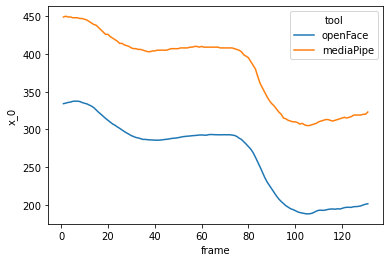

In [10]:
of_csv = OPENFACE_DIR + video + '.csv'
of_df = pd.read_csv(of_csv)
of_df['tool'] = ['openFace' for _ in range(len(of_df.index))]

mp_csv = MEDIAPIPE_DIR + video + '_mediapipe.csv'
mp_df = pd.read_csv(mp_csv)
mp_df['tool'] = ['mediaPipe' for _ in range(len(mp_df.index))]

df = pd.concat([of_df, mp_df], ignore_index=True)

sns.lineplot(x='frame', y='x_0', data=df, hue='tool')
plt.show()

In [ ]:
x_regex_pat = re.compile(r'^x_[0-9]+$')
y_regex_pat = re.compile(r'^y_[0-9]+$')

fig, axes = plt.subplots(8, 5, figsize=(15, 15), sharex=True, sharey=True)
axes = axes.flatten()

for i, videoName in enumerate(small_videoList):
    videoCsv = base_dir + videoName + '/' + videoName + '.csv'
    df = pd.read_csv(videoCsv)
    df.columns = columns

    x_locs = df.columns[df.columns.str.contains(x_regex_pat)]
    y_locs = df.columns[df.columns.str.contains(y_regex_pat)]


    palette = sns.color_palette()
    avg_face_df = pd.DataFrame({'x_locs': df[x_locs].mean(axis=1), 'y_locs': df[y_locs].mean(axis=1)})
    sns.scatterplot(x='x_locs', y='y_locs', data=avg_face_df, marker='+', ax=axes[i])
    axes[i].set(xlim=[0, 1920], ylim=[1080, 0], title=videoName)
plt.tight_layout()
plt.show()